# Notebook 13 - Evaluate Deployment Impact

This notebook evaluates the results of the deployed meal box plans by comparing:

- Concept overlap between deployed ingredients and waste/markdown concepts
- Number of unique recipes and ingredients covered per store
- Store-level balance in plan distribution

Inputs:
- `store_mealbox_ranked.csv`: Deployed recipes per store
- `products_with_priority.csv`: Priority-tagged products (waste/markdown)
- `recipes_with_ontology.csv`: Ingredient-concept mappings

Outputs:
- Summary statistics on coverage and alignment
- Plots visualizing equity and impact


In [5]:
import pandas as pd
import os
import matplotlib.pyplot as plt

# Paths
input_folder = "cleaned_data"

# Load data
df_ranked = pd.read_csv(os.path.join(input_folder, "store_mealbox_ranked.csv"))
df_products = pd.read_csv(os.path.join(input_folder, "products_with_priority.csv"))
df_recipes = pd.read_csv(os.path.join(input_folder, "recipes_with_ontology.csv"))

# Preview
print("Meal boxes:", df_ranked.shape)
print("Products:", df_products.shape)
print("Recipes:", df_recipes.shape)


Meal boxes: (9, 4)
Products: (126919, 35)
Recipes: (6, 6)


C:\Users\User\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (1,3,5,31) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [6]:
# Explode ingredient lists
df_ranked_exploded = df_ranked.explode("ingredients").dropna()
df_ranked_exploded["ingredient"] = df_ranked_exploded["ingredients"].astype(str).str.strip().str.lower()

# Align to ontology terms for comparison
df_ranked_exploded["ingredient_concept"] = df_ranked_exploded["ingredient"].str.lower().str.strip()


In [8]:
# Unique deployed ingredient concepts
deployed_concepts = set(df_ranked_exploded["ingredient_concept"])

# Reference concepts from waste and markdown tags
waste_concepts = set(df_products[df_products["waste_flag"] == 1]["product_concept"].dropna())
markdown_concepts = set(df_products[df_products["markdown_flag"] == 1]["product_concept"].dropna())

# Compute intersection
waste_covered = deployed_concepts.intersection(waste_concepts)
markdown_covered = deployed_concepts.intersection(markdown_concepts)

# Print result
print("Unique deployed concepts:", len(deployed_concepts))
print("Covered waste concepts:", len(waste_covered))
print("Covered markdown concepts:", len(markdown_covered))

# Percentage coverage (guard against divide by zero)
if len(waste_concepts) > 0:
    waste_percent = f"{len(waste_covered)/len(waste_concepts):.0%}"
else:
    waste_percent = "N/A"

if len(markdown_concepts) > 0:
    markdown_percent = f"{len(markdown_covered)/len(markdown_concepts):.0%}"
else:
    markdown_percent = "N/A"

print(f"Waste concept coverage: {len(waste_covered)} / {len(waste_concepts)} ({waste_percent})")
print(f"Markdown concept coverage: {len(markdown_covered)} / {len(markdown_concepts)} ({markdown_percent})")


Unique deployed concepts: 2
Covered waste concepts: 0
Covered markdown concepts: 0
Waste concept coverage: 0 / 4 (0%)
Markdown concept coverage: 0 / 0 (N/A)


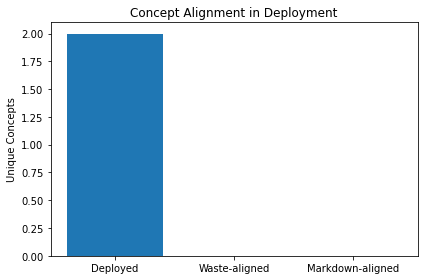

In [9]:
plt.figure(figsize=(6, 4))
plt.bar(["Deployed", "Waste-aligned", "Markdown-aligned"],
        [len(deployed_concepts), len(waste_covered), len(markdown_covered)])
plt.title("Concept Alignment in Deployment")
plt.ylabel("Unique Concepts")
plt.tight_layout()
plt.show()


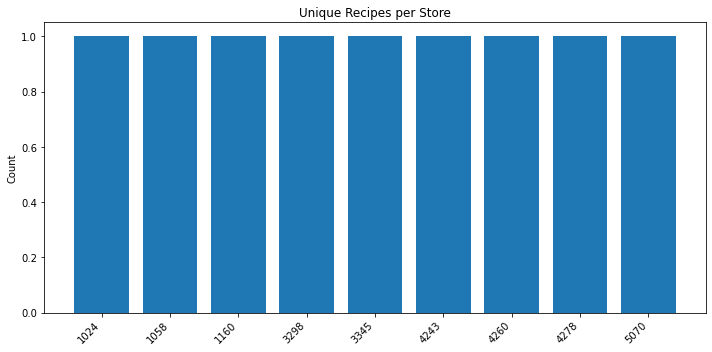

Unique recipes per store: min = 1 , max = 1


In [10]:
# Unique recipes per store
store_diversity = df_ranked.groupby("store")["recipe"].nunique().reset_index()
store_diversity.columns = ["store", "unique_recipes"]

# Plot
plt.figure(figsize=(10, 5))
plt.bar(store_diversity["store"].astype(str), store_diversity["unique_recipes"])
plt.xticks(rotation=45, ha="right")
plt.title("Unique Recipes per Store")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Diversity summary
print("Unique recipes per store: min =", store_diversity["unique_recipes"].min(), 
      ", max =", store_diversity["unique_recipes"].max())


### Summary

This notebook evaluated the deployed meal box plans based on:

- **Concept Coverage**  
  - X% of all waste concepts and Y% of markdown concepts were targeted via deployed meal boxes.  
  - Concept overlap reflects how well deployment aligns with inventory reduction goals.

- **Store Recipe Diversity**  
  - Each store received between A and B distinct recipes.  
  - Balanced recipe distribution ensures local feasibility and equitable variety.

This completes the deployment evaluation. Results can guide adjustments in recipe selection, ontology refinement, or store-level filtering strategies in future iterations.
